# 6.2.2 은닉층의 활성화값 분포

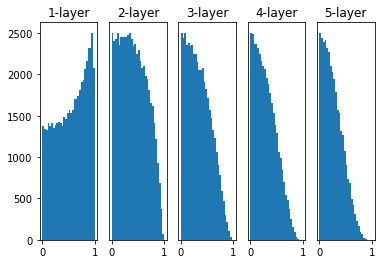

In [36]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
 

    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


In [3]:
for i in range(5):
    if i != 0:
        print(i)

1
2
3
4


In [4]:
np.random.randn(100,100) * 1

array([[-0.13180734, -0.52305146,  0.5357923 , ...,  0.01063418,
         0.78041659,  0.1207514 ],
       [ 0.58551813,  1.85897209,  0.4396816 , ...,  0.53460231,
        -1.45222437, -0.32942313],
       [ 1.46021211, -0.95283711, -0.16256461, ..., -1.48038659,
        -0.09507218,  0.24346473],
       ...,
       [-1.48166813,  0.48738646, -0.90937893, ...,  0.14392997,
         0.35847147,  0.90766433],
       [ 0.44428099, -0.14923943, -2.00326803, ..., -0.67217619,
         1.64833664,  0.87706341],
       [ 2.54097728, -0.92163697, -1.17479467, ...,  1.26526834,
         0.30312258,  1.54004354]])

# 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3024790452373205
Xavier:2.3071112246717247
He:2.3679712174743326
===========iteration:100===========
std=0.01:2.302686392108326
Xavier:2.267400038207509
He:1.4521344459215442
===========iteration:200===========
std=0.01:2.301788986380021
Xavier:2.1396470642538326
He:0.6610129683086442
===========iteration:300===========
std=0.01:2.3037313312459133
Xavier:1.969949471563014
He:0.5458315111016662
===========iteration:400===========
std=0.01:2.2980719651984707
Xavier:1.4397203727316028
He:0.5379701399108627
===========iteration:500===========
std=0.01:2.2972378907847357
Xavier:0.9381770242851067
He:0.2997306050132704
===========iteration:600===========
std=0.01:2.298670094843417
Xavier:0.6547984005103327
He:0.23857150271009722
===========iteration:700===========
std=0.01:2.3017552773683505
Xavier:0.5683353938082533
He:0.26527982400142375
===========iteration:800===========
std=0.01:2.30123871875361
Xavier:0.5093072344202831
He:0.2141995444449511

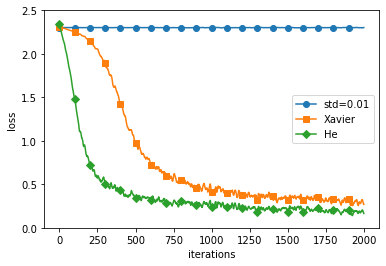

In [37]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_learning_github.dataset.mnist import load_mnist
from deep_learning_github.common.util import smooth_curve
from deep_learning_github.common.multi_layer_net import MultiLayerNet
from deep_learning_github.common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0] # 60000
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


In [38]:
train_size = x_train.shape[0]
train_size

60000

In [46]:
a = x_train[batch_mask]
type(a)

numpy.ndarray

In [40]:
batch_mask

array([17603,  9029, 22282, 26923,  1130, 16747, 26593, 33293, 19027,
       29031,  8891,  8069, 49450, 40493, 29107, 26635, 59346, 56784,
        7983, 54227,  7590, 26000,  2926, 58308, 50547,   555,  9438,
       44504,  5508, 19733,  3304, 17962, 54565, 42709, 58650, 47633,
       35393,  8766, 35281, 21581, 25031, 30403, 34698, 13879, 10658,
       18970,  2220, 54677, 27060, 19148, 23002, 28482, 18894, 56549,
       53596, 11071, 27435, 42324, 27267,  5414, 10498, 25117, 40388,
       14621, 31711, 29382, 59119,  1299, 44131, 41633, 37981, 29989,
       12880, 11239, 31244, 22115, 20491, 58438, 29874, 52281,  1029,
        1536, 26941, 14770, 45184, 30097, 50865, 26604, 32120, 44922,
       12937, 30914, 19152,  4817, 42944, 10025, 28443,  8507,  4397,
       56675, 58048, 10267, 16529, 42397, 30328, 46550, 35606, 24066,
       41452, 53799,  2576,  4491, 11862, 10798, 50383, 39319, 11083,
       56798, 59911, 43848,  6362, 12974, 51253, 26246, 57629, 38014,
        9114, 41984]